<a href="https://colab.research.google.com/github/chaitsugale/Stock-Market-Prediction-The-Spark-Foundation-/blob/main/Stock_Market_Prediction_Using_Numerical_and_Textual_Analysis(The_Spark_Foundation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction Using Numerical and Textual Analysis

Author : Chaitanya Ugale

Objective: Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

Here We are analyzing and predicting the stocks of BOMBAY STOCK EXCHANGE i.e. SENSEX (S&F BSE SENSEX) 

SENSEX or BOMBAY STOCK EXCHANGE is the oldest stock exchange in ASIA establishing in 1875.

## Loading the Package

> Loading all the important packages for analyzing and predicting alonng with plotting graph



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Part A : Numerical Analysis Using Stock Market Data

Here We will extracting the data of **Bombay Stock Exchange** from yahoo finance through **Python API**

So we are installing the PYPI yfinance

In [3]:
# installing pypi package for yahoo finance


!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 165.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 195.0 MB/s eta 0:00:00


In [4]:
import yfinance as yf

### Step 1 : Extracting the BSE Data from Yahoo Finance API

> We are extracting the data of **Bombay Stock Exchange** from **1st Jan 2001 to 31st March 2022**(As for news analysis we have data *till 31st March 2022*)





In [5]:
bse_data = yf.download('^BSESN',start = '2001-01-01',end = '2022-03-31')
print(bse_data)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2001-01-02   3953.219971   4028.570068   3929.370117   4018.879883   
2001-01-03   3977.580078   4067.659912   3977.580078   4060.020020   
2001-01-04   4180.970215   4180.970215   4109.549805   4115.370117   
2001-01-05   4116.339844   4195.009766   4115.350098   4183.729980   
2001-01-08   4164.759766   4206.720215   4101.529785   4120.430176   
...                  ...           ...           ...           ...   
2022-03-24  57190.050781  57827.988281  57138.511719  57595.679688   
2022-03-25  57801.718750  57845.371094  57100.238281  57362.199219   
2022-03-28  57472.718750  57638.339844  56825.089844  57593.488281   
2022-03-29  57814.761719  58001.531250  57639.351562  57943.648438   
2022-03-30  58362.851562  58727.781250  58176.000000  58683.988281   

               Adj C

In [6]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
bse_data.reset_index(inplace=True)

In [8]:
bse_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


In [9]:
bse_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5229,2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
5230,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
5231,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300
5232,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100
5233,2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300


In [10]:
bse_data.shape

(5234, 7)

In [11]:
bse_data.size

36638

In [12]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5234 non-null   datetime64[ns]
 1   Open       5234 non-null   float64       
 2   High       5234 non-null   float64       
 3   Low        5234 non-null   float64       
 4   Close      5234 non-null   float64       
 5   Adj Close  5234 non-null   float64       
 6   Volume     5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


In [13]:
bse_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Formatted the Date column with datetime

In [14]:
bse_data['Date'] = pd.to_datetime(bse_data['Date'])

In [15]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5234 non-null   datetime64[ns]
 1   Open       5234 non-null   float64       
 2   High       5234 non-null   float64       
 3   Low        5234 non-null   float64       
 4   Close      5234 non-null   float64       
 5   Adj Close  5234 non-null   float64       
 6   Volume     5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


### Step 2 : Cheking the weekly moving average of Close Data

In [16]:
def bse_stock_weekly_moving_avg(weeks,df):
  close_data = pd.DataFrame({'date': df['Date'] , 'close': df['Close']})
  close_data.set_index('date',inplace=True)
  num = weeks * 5
  close_data['moving_avg'] = close_data['close'].rolling(window = num).mean().shift()
  return close_data.dropna()

In [17]:
bse_stock_weekly_moving_avg(4,bse_data).head()

,close,moving_avg
date,,
2001-01-31,4326.720215,4153.535486
2001-02-01,4286.109863,4168.927502
2001-02-02,4352.259766,4180.231995
2001-02-05,4370.470215,4192.076477
2001-02-06,4375.290039,4201.413489


<Axes: xlabel='date'>

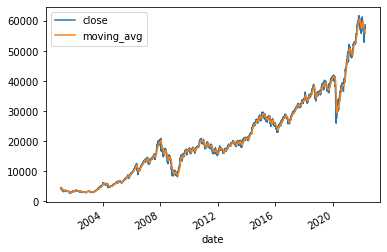

In [18]:
bse_stock_weekly_moving_avg(4,bse_data).plot()

Text(0, 0.5, 'Close')

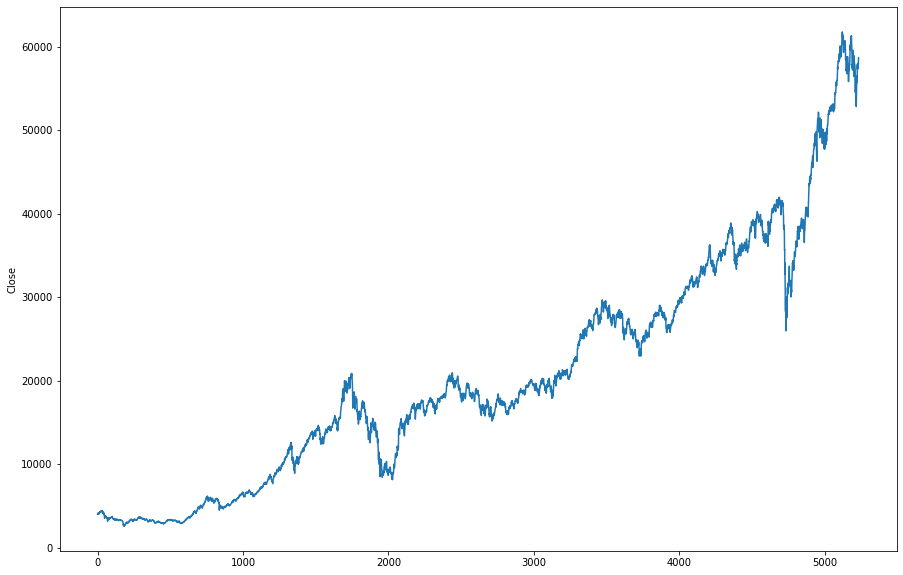

In [19]:
plt.figure(figsize=(15, 10))
bse_data['Close'].plot()
plt.ylabel('Close')

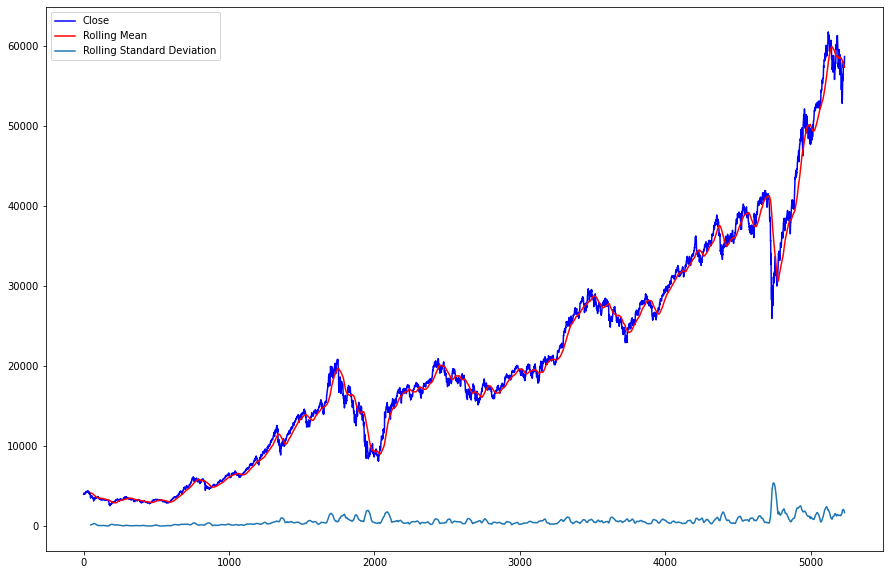

In [20]:
#Plotting moving average for window 50
bse_close = bse_data['Close']
ma_50 = bse_close.rolling(window = 50).mean()
std_50 = bse_close.rolling(window = 50).std()

plt.figure(figsize=(15, 10))
bse_data['Close'].plot(color = 'b', label = 'Close')
ma_50.plot(color = 'r', label = 'Rolling Mean')
std_50.plot(label = 'Rolling Standard Deviation')
plt.legend()

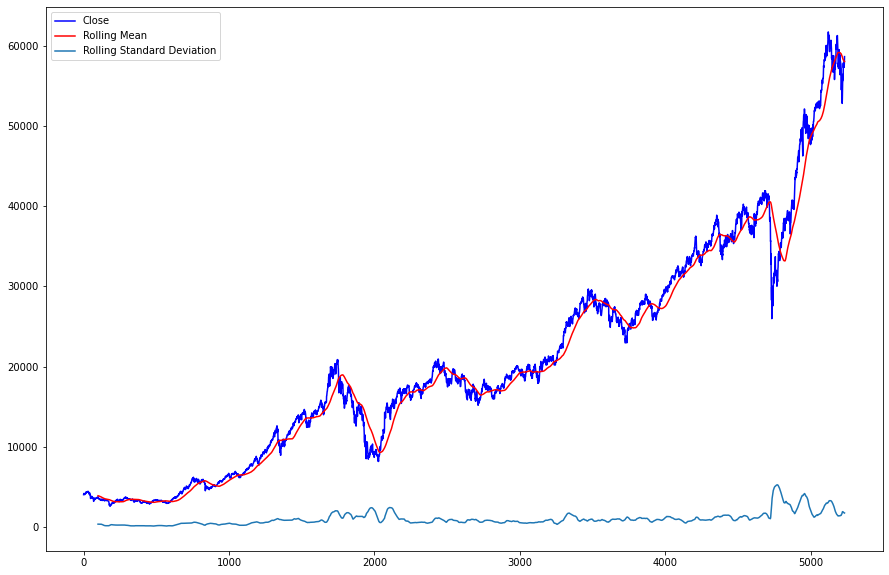

In [21]:
#Plotting moving average for window 100
bse_close = bse_data['Close']
ma_100 = bse_close.rolling(window = 100).mean()
std_100 = bse_close.rolling(window = 100).std()

plt.figure(figsize=(15, 10))
bse_data['Close'].plot(color = 'b', label = 'Close')
ma_100.plot(color = 'r', label = 'Rolling Mean')
std_100.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

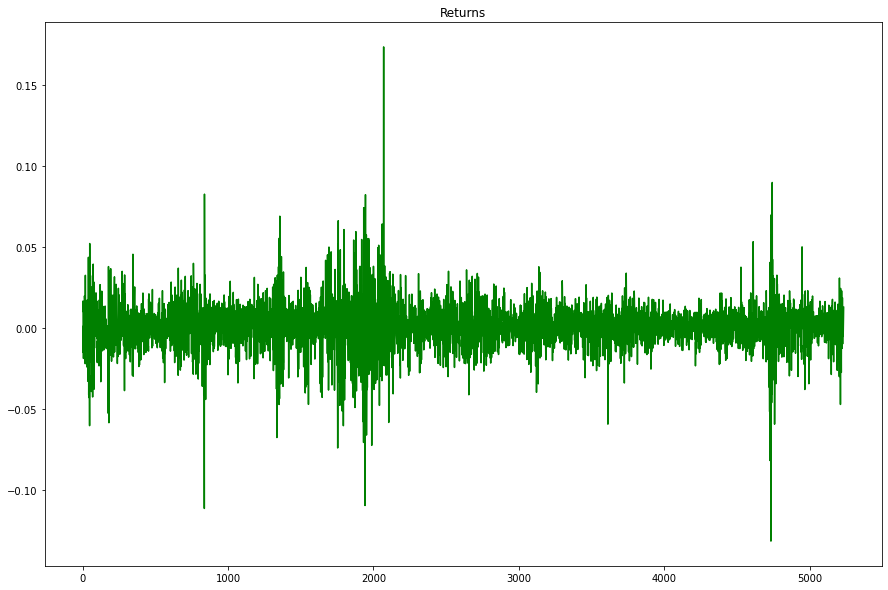

In [22]:
# Plotting return

bse_returns =  bse_close/bse_close.shift(1) - 1

plt.figure(figsize=(15, 10))

bse_returns.plot(label='Return' , color = 'green')

plt.title('Returns')

### Step 3 : Numerical Analysis using Rolling Average and Standard Deviation

We will perform 80:20 of the bse_data for train and test 



*   train = 80% = 4187
*   test = 20% = 1097




In [23]:
bse_train = bse_data[:4187]
bse_test = bse_data[4187:]

#### a. Normal BSE Tran Close Data

Creating new function for calculating rolling mean and standard deviation

In the same function we are also testing the Stationary of the time series by using **Dickey Fuller Test**

In [24]:
def test_stationary(timeseries):
  rolmean = timeseries.rolling(30).mean() #We are using 30 days window for rolling mean
  rolstd = timeseries.rolling(30).std() #We are using 30 days window for rolling standard

  plt.figure(figsize = (15,10))
  plt.plot(timeseries,color = 'y',label = 'original',linewidth=5.0)
  plt.plot(rolmean,color='r',label = 'rolling mean')
  plt.plot(rolstd,color = 'b',label = 'rolling standard')
  plt.xlabel('Date')
  plt.legend()
  plt.title('Rolling Mean and standard Deviation',fontsize = 25)
  #plt.title(timeseries)
  plt.show(block = False)

  print('**************Result of Dickey Fuller Test***************')
  result = adfuller(timeseries,autolag = 'AIC')
  print(result)
  labels = ['ADF Test Statistics' , 'p-value' ,'#Lags Used','Number of Observation Used','Critical Value']
  for value,label in zip(result,labels):
    print(label+ ' : ' +str(value))
  if result[1] <= 0.05:
    print('Reject the Null Hypothesis (Ho) test and the Time series is Stationary')
  else:
    print('Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary')

We will test the test_stationary function with BSE Train Close Data

************ BSE TRAIN CLOSE DATA *******************


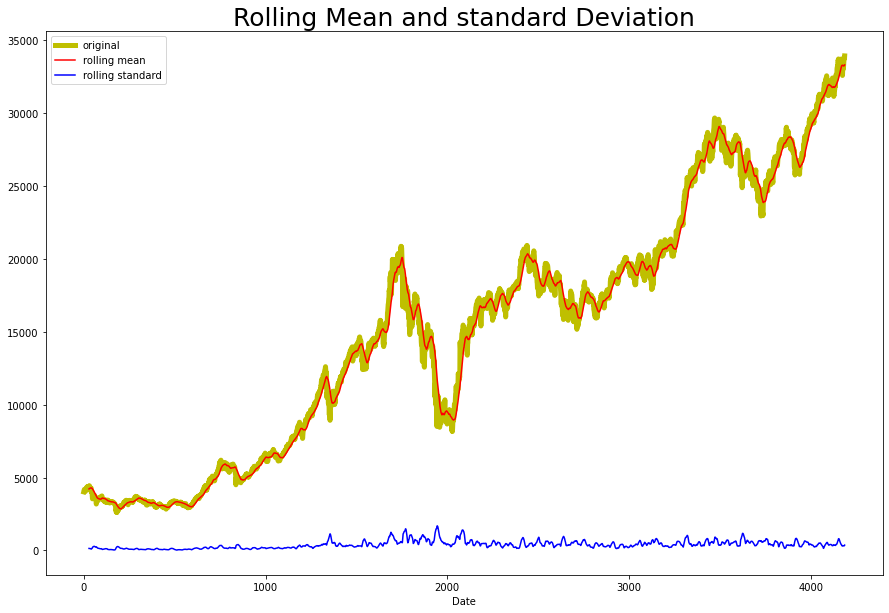

**************Result of Dickey Fuller Test***************
(0.24060137901497025, 0.9744490414976874, 5, 4181, {'1%': -3.431915013004786, '5%': -2.862231536705791, '10%': -2.5671381109420808}, 55963.18736614873)
ADF Test Statistics : 0.24060137901497025
p-value : 0.9744490414976874
#Lags Used : 5
Number of Observation Used : 4181
Critical Value : {'1%': -3.431915013004786, '5%': -2.862231536705791, '10%': -2.5671381109420808}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [25]:
print('************ BSE TRAIN CLOSE DATA *******************')
test_stationary(bse_train['Close'])

As per this test we can see the Time series is not stationary so we will transform the train data with log to test the stationary of time series

#### b. Log Transformation of BSE Train Close Data

For forecasting and economic analysis many variables are used in **logarithms (logs)**. In time series analysis, this transformation is often considered to stabilize the variance of a series. 

We are applying log transformation in both train and test data of BSE

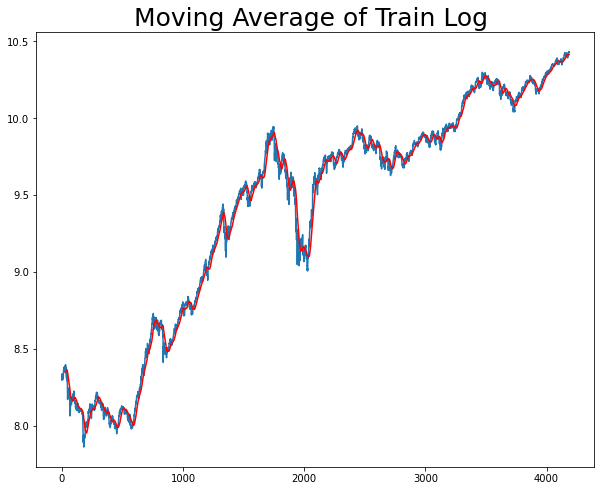

In [26]:
bse_train_log = np.log(bse_train['Close'])
bse_test_log = np.log(bse_test['Close'])

moving_avg_train = bse_train_log.rolling(30).mean()

plt.figure(figsize = (10,8))
plt.title('Moving Average of Train Log ',fontsize = 25)
plt.plot(bse_train_log)
plt.plot(moving_avg_train,color = 'red')

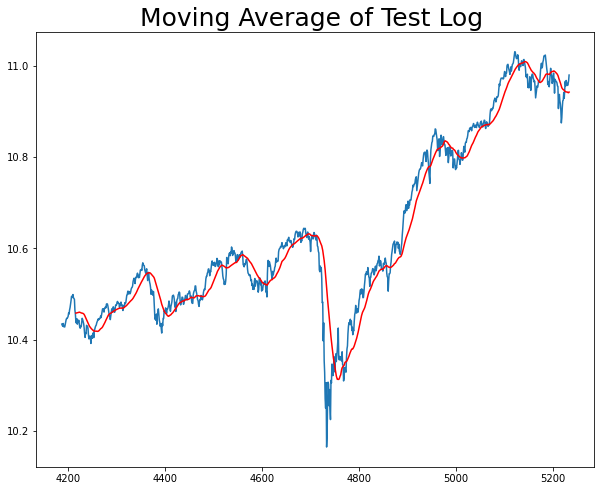

In [27]:
moving_avg_test = bse_test_log.rolling(30).mean()

plt.figure(figsize = (10,8))
plt.title('Moving Average of Test Log ',fontsize = 25)
plt.plot(bse_test_log)
plt.plot(moving_avg_test,color = 'red')

In [28]:
bse_train_log.isnull().sum()

0

In [29]:
bse_test_log.isnull().sum()

0

************* BSE TRAIN LOG DATA **********


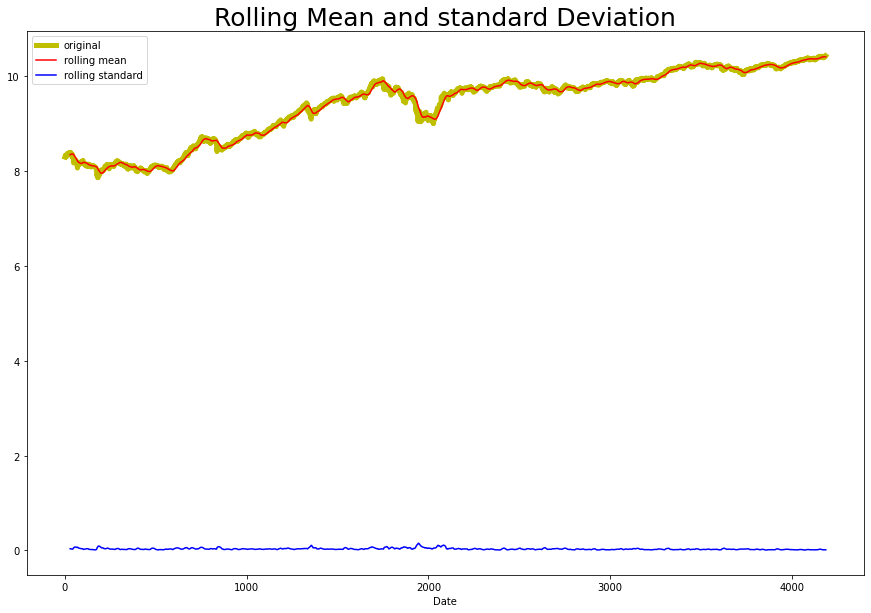

**************Result of Dickey Fuller Test***************
(-0.7575135162822315, 0.8312848036115219, 2, 4184, {'1%': -3.4319138901739477, '5%': -2.8622310406877443, '10%': -2.5671378468850654}, -23462.118875718344)
ADF Test Statistics : -0.7575135162822315
p-value : 0.8312848036115219
#Lags Used : 2
Number of Observation Used : 4184
Critical Value : {'1%': -3.4319138901739477, '5%': -2.8622310406877443, '10%': -2.5671378468850654}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [30]:
bse_train_log.dropna(inplace=True)
bse_test_log.dropna(inplace=True)

print('************* BSE TRAIN LOG DATA **********')

test_stationary(bse_train_log)

************* BSE TEST LOG DATA **********


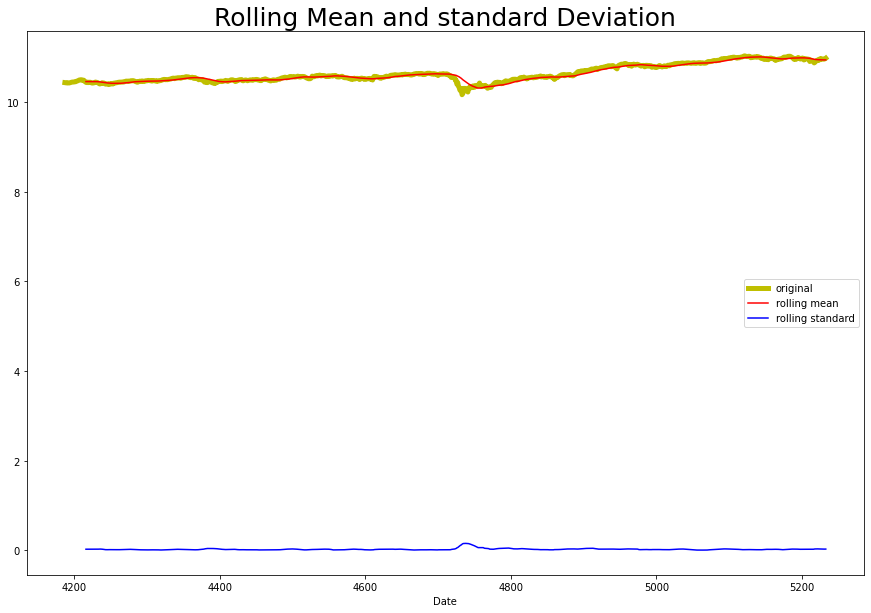

**************Result of Dickey Fuller Test***************
(-0.693213404586969, 0.8484995961793329, 12, 1034, {'1%': -3.4366900467481667, '5%': -2.8643392574735627, '10%': -2.568260441619371}, -6019.398461794285)
ADF Test Statistics : -0.693213404586969
p-value : 0.8484995961793329
#Lags Used : 12
Number of Observation Used : 1034
Critical Value : {'1%': -3.4366900467481667, '5%': -2.8643392574735627, '10%': -2.568260441619371}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [31]:
print('************* BSE TEST LOG DATA **********')

test_stationary(bse_test_log)

As per Dicket Fuller Test for both train and test it failed to reject null hypothesis even after log transformation.

So we will create new data by the diference of train log and moving average of train data

#### c. Difference of BSE Train Close Log and Mobing average of BSE Train Close

In [32]:
bse_train_log_diff = bse_train_log - moving_avg_train

print(bse_train_log_diff)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4182    0.010609
4183    0.017118
4184    0.014806
4185    0.013679
4186    0.018495
Name: Close, Length: 4187, dtype: float64


In [33]:
bse_train_log_diff.isna().sum()

29

In [34]:
bse_train_log_diff.dropna(inplace=True)

In [35]:
bse_train_log_diff

29      0.033506
30      0.030780
31      0.044829
32      0.018572
33      0.021952
          ...   
4182    0.010609
4183    0.017118
4184    0.014806
4185    0.013679
4186    0.018495
Name: Close, Length: 4158, dtype: float64

******************Train Log Difference Data ****************


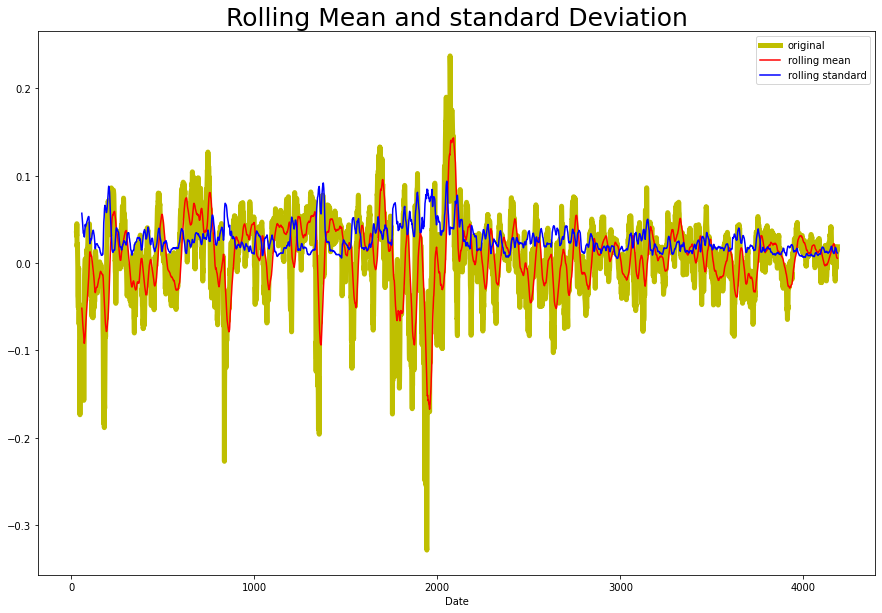

**************Result of Dickey Fuller Test***************
(-11.139639736983177, 3.1316277150304194e-20, 17, 4140, {'1%': -3.431930521551653, '5%': -2.8622383876911655, '10%': -2.567141758092371}, -23626.455812701213)
ADF Test Statistics : -11.139639736983177
p-value : 3.1316277150304194e-20
#Lags Used : 17
Number of Observation Used : 4140
Critical Value : {'1%': -3.431930521551653, '5%': -2.8622383876911655, '10%': -2.567141758092371}
Reject the Null Hypothesis (Ho) test and the Time series is Stationary


In [36]:
print('******************Train Log Difference Data ****************')

test_stationary(bse_train_log_diff)

Here it rejects the null hypothesis and time series is stationary




### Step 4: Predicting the trainlog data by using AUTO ARIMA

> **Auto-Regressive Integrated Moving Average (ARIMA)** is a time series model that identifies hidden patterns in time series values and makes predictions.

 

In [37]:
#installing pmdarima 

!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.8 MB/s eta 0:00:00


In [38]:
from pmdarima import auto_arima

In [39]:
bse_model = auto_arima(bse_train_log,trace=True,error_action = 'ignore',supress_warning = True)
bse_model.fit(bse_train_log)

bse_prediction = bse_model.predict(n_periods = len(bse_test))
bse_prediction = pd.DataFrame(bse_prediction,index=bse_test_log.index,columns = ['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-23640.796, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-23605.158, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-23631.217, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23634.468, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-23601.933, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-23642.843, Time=0.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-23642.383, Time=2.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-23638.501, Time=1.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-23640.893, Time=10.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-23642.951, Time=4.81 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-23640.955, Time=5.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-23638.987, Time=6.76 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-23639.795, Time=1.41 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 37.552 se

In [40]:
bse_prediction.head()

,Prediction
4187,10.433377
4188,10.433639
4189,10.434025
4190,10.434529
4191,10.435033


Text(0, 0.5, 'Actual Stock Price')

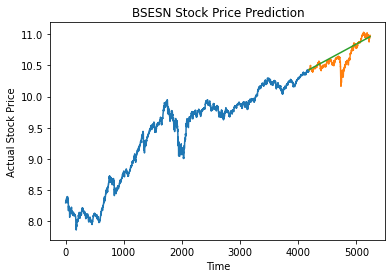

In [41]:

plt.plot(bse_train_log, label='Train')
plt.plot(bse_test_log, label='Test')
plt.plot(bse_prediction, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
     

Calculating error using root mean square error (RMSE) with test data and prediction data

In [42]:
bse_rms = np.sqrt(mean_squared_error(bse_test_log,bse_prediction))
print("Root Mean Square Error (RMSE) : ", bse_rms)

Root Mean Square Error (RMSE) :  0.12666367065852147


Here the RMSE is less and a low RMSE value indicates that the *simulated and observed data are close to each other showing a better accuracy.*


# Part B : Textual and Sentimental Analysis for India News Data

### Step 1: Importing the data from KAGGLE 

We are loading the India News Dataset directly from Kaggle site as we can see the news data from **1st Jan 2001 and 31st March 2022**.

Please refer this link for more info : https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

ONLY FOR GOOGLE COLAB : Please make sure to add the kaggle.json (API doenloaded from  Kaggle) on path mentioned in image before running the installation

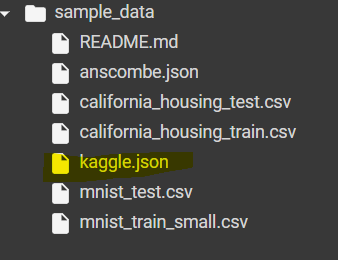

In [43]:
#installing kaggle
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
#making directory for kaggle path

! mkdir ~/.kaggle

In [45]:
#copy the kaggle.json file to kaggle path

! cp /content/sample_data/kaggle.json ~/.kaggle/

In [46]:
#giving access for kaggle.json and file

! chmod 600 ~/.kaggle/kaggle.json

In [47]:
# Downloading dataset of India News Headline data from kaggle

! kaggle datasets download -d therohk/india-headlines-news-dataset

 91% 79.0M/86.6M [00:00<00:00, 153MB/s]
100% 86.6M/86.6M [00:00<00:00, 119MB/s]


In [48]:
#As the file is zipped so we need to unzip the file for easy access

! unzip india-headlines-news-dataset.zip

Archive:  india-headlines-news-dataset.zip
  inflating: india-news-headlines.csv  


### Step 2 : Loading the data

In [49]:
cols = ['Date','Category','News']
india_news_data = pd.read_csv('india-news-headlines.csv', names = cols)
india_news_data.drop(0, inplace=True)
india_news_data.head()

,Date,Category,News
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic


In [50]:
# Formatting the data column with datetime format

india_news_data['Date'] = pd.to_datetime(india_news_data['Date'],format = '%Y%m%d')
india_news_data.head()

,Date,Category,News
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa
5,2001-01-02,unknown,Extra buses to clear tourist traffic


In [51]:
pd.set_option('display.max_rows', None)

In [52]:
india_news_data['Category'].astype('category').value_counts()

india                                                         297491
unknown                                                       209583
city.mumbai                                                   150451
city.delhi                                                    137648
business.india-business                                       121195
city.hyderabad                                                119024
city.chandigarh                                               117718
city.bengaluru                                                 98635
city.pune                                                      98633
city.ahmedabad                                                 98269
city.kolkata                                                   93978
entertainment.hindi.bollywood                                  93099
city.lucknow                                                   91764
city.goa                                                       88978
city.nagpur                       

In [53]:
round(((india_news_data['Category'].astype('category').value_counts()/len(india_news_data.index))*100),5) 

india                                                         8.14827
unknown                                                       5.74047
city.mumbai                                                   4.12085
city.delhi                                                    3.77018
business.india-business                                       3.31953
city.hyderabad                                                3.26007
city.chandigarh                                               3.22429
city.bengaluru                                                2.70161
city.pune                                                     2.70156
city.ahmedabad                                                2.69159
city.kolkata                                                  2.57406
entertainment.hindi.bollywood                                 2.54998
city.lucknow                                                  2.51341
city.goa                                                      2.43711
city.nagpur         

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

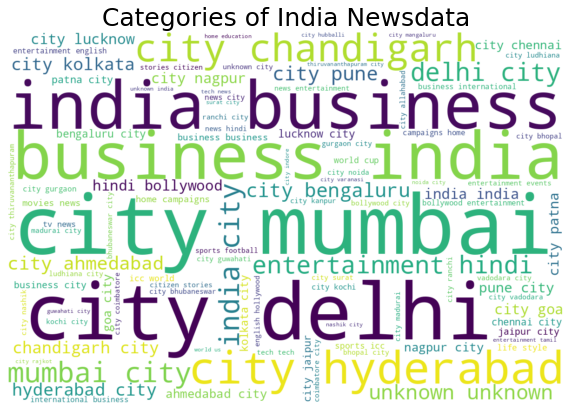

In [55]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      colormap='viridis',
                      max_words = 100, 
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(india_news_data['Category'].astype('category')))


plt.title('Categories of India Newsdata', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [56]:
india_news_data.drop('Category',axis  = 1 , inplace = True)
india_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 55.7+ MB


In [57]:
india_news_data.head()

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic


In [58]:
india_news_data.shape

(3650970, 2)

### Step 3 : Transforming the data and deleting the duplicates of indian news headlines data

In [59]:
india_news_data['News'] = india_news_data.groupby(['Date']).transform(lambda x : ' '.join(x))

In [60]:
india_news_data = india_news_data.drop_duplicates() 
india_news_data.reset_index(inplace = True, drop = True)
india_news_data.shape

(7717, 2)

In [61]:
india_news_data['News'].head(25)

0     Status quo will not be disturbed at Ayodhya; s...
1     Powerless north India gropes in the dark Think...
2     The string that pulled Stephen Hawking to Indi...
3     Light combat craft takes India into club class...
4     Light combat craft takes India into club class...
5     Muslim body rules out talks on Ayodhya Bajrang...
6     Sangh Parivar; Babri panel up the ante Frontru...
7     Financier Bharat Shah held for alleged links w...
8     Fend for yourselves; Pande tells doctors Burea...
9     Sonia takes on the Hindutva brigade Congress h...
10    Govt extends J&K ceasefire by a month Peace hi...
11    Big bath passes without a hitch Security bando...
12    President against pitch for indirect polls TRA...
13    Monster quake kills 4;000 Forces to the rescue...
14    Death; distress; destruction...and it's not ov...
15    More tremors forecast for the next 48 hours Th...
16    Hrithik: Miss Indias' delight! Manoj Bajpai: F...
17    Relief operations take back seat in Bhuj F

### Step 4 : Sentimental Analysis Using TextBlob

> TextBlob is a simple library which supports complex analysis and operations on textual data. For lexicon-based approaches, a sentiment is defined by its semantic orientation and the intensity of each word in the sentence. This requires a pre-defined dictionary classifying negative and positive words.



In [62]:
from textblob import TextBlob

We will analyse the india news headline using Polarity and **Subjectivity**

*   Polarity is the output that lies between [-1,1], **where -1 refers to negative sentiment and +1 refers to positive sentiment**.
*   Subjectivity is the output that lies within [0,1] and refers to **personal opinions and judgments.**

In [63]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [64]:
india_news_data['Subjectivity'] = india_news_data['News'].apply(getSubjectivity)
india_news_data['Polarity'] = india_news_data['News'].apply(getPolarity)
india_news_data.head(25)

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
5,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...,0.365356,-0.060708
6,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...,0.414653,-0.019214
7,2001-01-09,Financier Bharat Shah held for alleged links w...,0.501934,-0.003837
8,2001-01-10,Fend for yourselves; Pande tells doctors Burea...,0.000000,0.000000
9,2001-01-23,Sonia takes on the Hindutva brigade Congress h...,0.293515,0.084455


<Axes: >

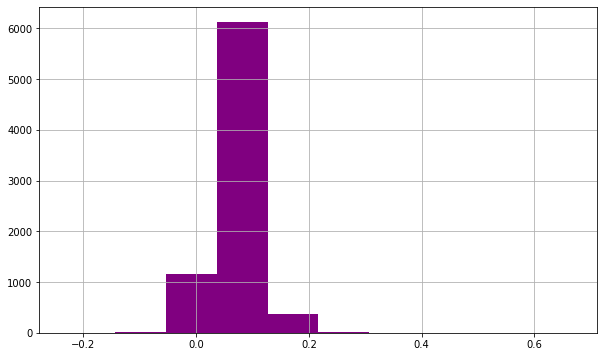

In [65]:
plt.figure(figsize = (10,6))
india_news_data['Polarity'].hist(color = 'purple')

<Axes: >

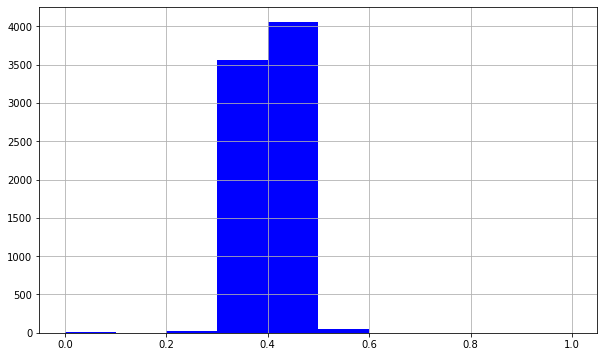

In [66]:

plt.figure(figsize = (10,6))
india_news_data['Subjectivity'].hist(color = 'blue')

### Step 5 : Sentiment Analysis using VADER i.e. **SentimentIntensityAnalyzer**

> **VADER ( Valence Aware Dictionary for Sentiment Reasoning)** is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. 


In [67]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps

In [69]:
sia = SentimentIntensityAnalyzer()

Polarity classification
The VADER library returns 4 values such as:

1.   pos: The probability of the sentiment to be positive
2.   neu: The probability of the sentiment to be neutral
3.   neg: The probability of the sentiment to be negative
4.   compound: The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1

Typical threshold values are the following:

1. positive: compound score >= 0.05
2. neutral: compound score between -0.05 and 0.05
3. negative: compound score <= -0.05


In [70]:
#Wcalculating the compound and there threshold

india_news_data['Compound'] = [sia.polarity_scores(v)['compound'] for v in india_news_data['News']]
india_news_data['Negative'] = [sia.polarity_scores(v)['neg'] for v in india_news_data['News']]
india_news_data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in india_news_data['News']]
india_news_data['Positive'] = [sia.polarity_scores(v)['pos'] for v in india_news_data['News']]
india_news_data.head(25)

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
5,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...,0.365356,-0.060708,-0.9944,0.131,0.848,0.021
6,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...,0.414653,-0.019214,-0.9779,0.121,0.812,0.066
7,2001-01-09,Financier Bharat Shah held for alleged links w...,0.501934,-0.003837,-0.9948,0.138,0.809,0.053
8,2001-01-10,Fend for yourselves; Pande tells doctors Burea...,0.000000,0.000000,-0.7096,0.277,0.723,0.000
9,2001-01-23,Sonia takes on the Hindutva brigade Congress h...,0.293515,0.084455,0.9152,0.054,0.852,0.094


### Step 6 : Plotting graph for sentiment Analysis

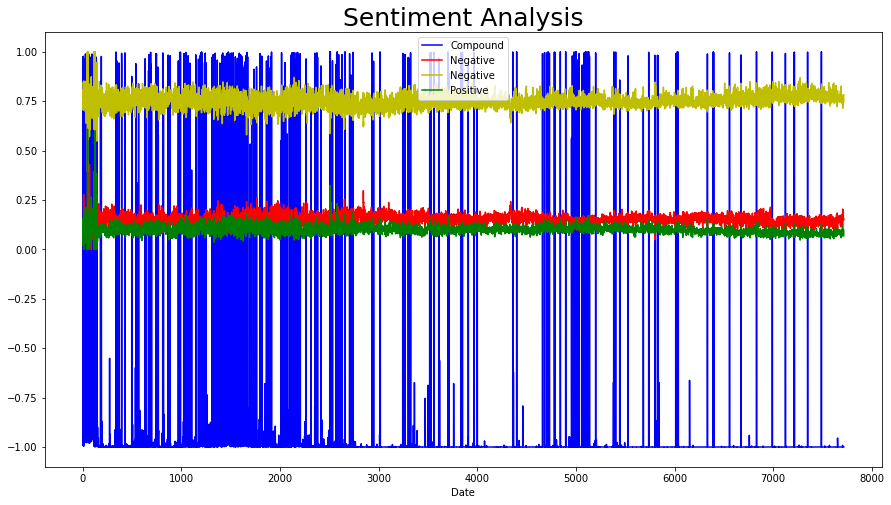

In [107]:
  plt.figure(figsize = (15,8))
  plt.plot(india_news_data['Compound'],color = 'b',label = 'Compound')
  plt.plot(india_news_data['Negative'],color='r',label = 'Negative')
  plt.plot(india_news_data['Neutral'],color = 'y',label = 'Negative')
  plt.plot(india_news_data['Positive'],color = 'g',label = 'Positive')
  plt.xlabel('Date')
  plt.legend()
  plt.title('Sentiment Analysis',fontsize = 25)
  #plt.title(timeseries)
  plt.show(block = False)


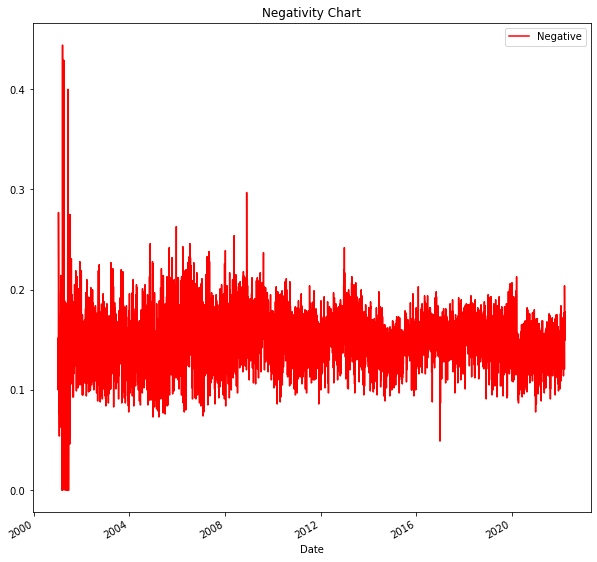

In [178]:

india_news_data.plot(x='Date', 
             y='Negative', 
             color = 'red',
             title='Negativity Chart');

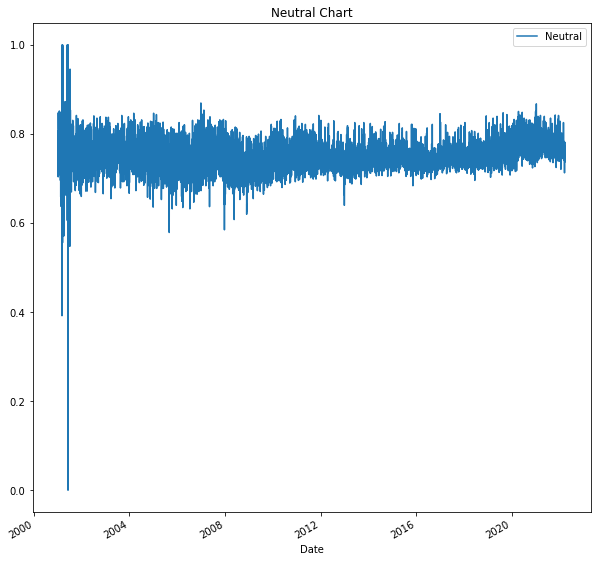

In [114]:

india_news_data.plot(x='Date', 
             y='Neutral', 
             title='Neutral Chart');

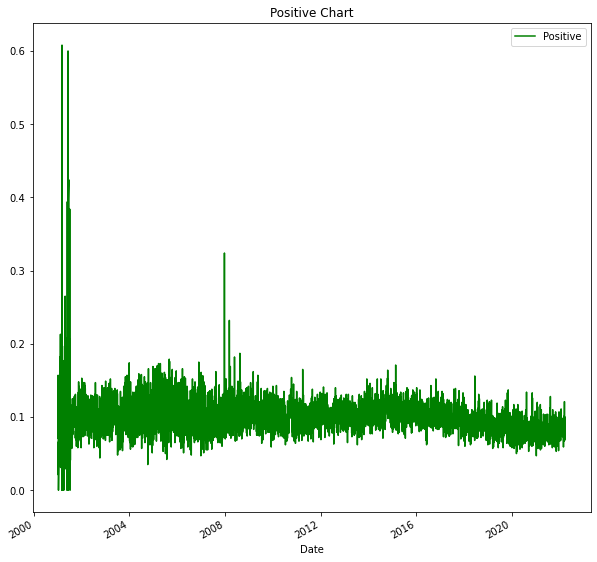

In [179]:

india_news_data.plot(x='Date', 
             y='Positive',
             color = 'green', 
             title='Positive Chart');

We can say that the headlines having more negative indication

# Part C : Merging Stock Market data with India News Data

> For final anaysis of Numerical and Textual Analysis we are merging the Stock Exchange data with India News Headline Data



### Step 1 : Merging the Stock Exchange data with India News Data

In [72]:
bse_news_analysis = pd.merge(bse_data,india_news_data,how = 'inner',on='Date')

In [73]:
bse_news_analysis.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,Sangh Parivar; Babri panel up the ante Frontru...,0.414653,-0.019214,-0.9779,0.121,0.812,0.066


In [74]:
bse_news_analysis.shape

(5205, 14)

In [75]:
bse_news_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5205 entries, 0 to 5204
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5205 non-null   datetime64[ns]
 1   Open          5205 non-null   float64       
 2   High          5205 non-null   float64       
 3   Low           5205 non-null   float64       
 4   Close         5205 non-null   float64       
 5   Adj Close     5205 non-null   float64       
 6   Volume        5205 non-null   int64         
 7   News          5205 non-null   object        
 8   Subjectivity  5205 non-null   float64       
 9   Polarity      5205 non-null   float64       
 10  Compound      5205 non-null   float64       
 11  Negative      5205 non-null   float64       
 12  Neutral       5205 non-null   float64       
 13  Positive      5205 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 610.0+ KB


In [76]:
analysis = bse_news_analysis[['Close','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]
analysis.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,4018.879883,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,4060.020020,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,4115.370117,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,4183.729980,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,4120.430176,0.414653,-0.019214,-0.9779,0.121,0.812,0.066


In [77]:
analysis.shape

(5205, 7)

### Step 2 : Training the model using Min Max Scaler

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
analysis_scaler = MinMaxScaler()
scaler_df = pd.DataFrame(analysis_scaler.fit_transform(analysis))
scaler_df.columns = analysis.columns
scaler_df.index = analysis.index


In [119]:
scaler_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.023980,0.282333,0.524545,0.00945,0.274775,0.807,0.116776
1,0.024675,0.407692,0.438811,0.36800,0.274775,0.766,0.182566
2,0.025610,0.446847,0.438129,0.93690,0.225225,0.797,0.169408
3,0.026766,0.476612,0.675488,0.98845,0.279279,0.719,0.258224
4,0.025696,0.414653,0.291981,0.01105,0.272523,0.812,0.108553


In [120]:
X = scaler_df.drop('Close',axis = 1)
y = scaler_df['Close']

In [121]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.524545,0.00945,0.274775,0.807,0.116776
1,0.407692,0.438811,0.36800,0.274775,0.766,0.182566
2,0.446847,0.438129,0.93690,0.225225,0.797,0.169408
3,0.476612,0.675488,0.98845,0.279279,0.719,0.258224
4,0.414653,0.291981,0.01105,0.272523,0.812,0.108553


In [122]:
y.head()

0    0.023980
1    0.024675
2    0.025610
3    0.026766
4    0.025696
Name: Close, dtype: float64

Train and Test using 70:30 model

In [123]:
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [124]:
X_train.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
4493,0.436078,0.400574,0.00005,0.380631,0.735,0.157895
501,0.412313,0.426565,0.00090,0.299550,0.772,0.156250
4125,0.382285,0.378981,0.00000,0.376126,0.737,0.157895
227,0.429153,0.469235,0.01590,0.259009,0.772,0.185855
3405,0.421117,0.392928,0.00030,0.317568,0.734,0.205592


In [125]:
X_train.shape

(3643, 6)

In [126]:
X_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
4493,0.436078,0.400574,0.00005,0.380631,0.735,0.157895
501,0.412313,0.426565,0.00090,0.299550,0.772,0.156250
4125,0.382285,0.378981,0.00000,0.376126,0.737,0.157895
227,0.429153,0.469235,0.01590,0.259009,0.772,0.185855
3405,0.421117,0.392928,0.00030,0.317568,0.734,0.205592
4392,0.393478,0.355583,0.00000,0.360360,0.761,0.128289
4432,0.398682,0.379413,0.00000,0.385135,0.755,0.121711
4154,0.369308,0.427048,0.00080,0.317568,0.726,0.218750
4899,0.400073,0.383418,0.00005,0.322072,0.789,0.113487
3471,0.412419,0.459418,0.00005,0.371622,0.737,0.161184


### Step 3 : Predicting the model

#### a. Random Forest Regressor

In [173]:
analysis_rf = RandomForestRegressor()
analysis_rf.fit(X_train,y_train)
prediction_rf = analysis_rf.predict(X_test)

In [174]:
print("Prediction : ",+prediction_rf[:10])

Prediction :  [0.47237924 0.63315779 0.05688844 0.29896416 0.23913469 0.07244072
 0.06791662 0.45423647 0.43562888 0.08650791]


In [175]:
print(y_test[:10])

3900    0.407293
4777    0.574562
1523    0.176995
2537    0.266117
241     0.012117
737     0.052320
42      0.020129
4050    0.495294
2795    0.225893
1708    0.297342
Name: Close, dtype: float64


In [176]:
print("*********** Random Forest Regressor **************")
print("Mean Square Error : ")
print(mean_squared_error(prediction_rf,y_test))
print("R2 Square : ")
print(r2_score(prediction_rf,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(prediction_rf,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(prediction_rf,y_test)))

*********** Random Forest Regressor **************
Mean Square Error : 
0.019175421995280068
R2 Square : 
0.46623970189085095
Mean Absolute Error : 
0.10413028150057985
Root Mean Square Error : 
0.13847534796952152


#### b. AdaBoost Regressor

In [148]:
from sklearn.ensemble import AdaBoostRegressor

In [149]:
analysis_adb = AdaBoostRegressor()
analysis_adb.fit(X_train,y_train)
predictions_adb = analysis_adb.predict(X_test)

In [153]:

print("*********** AdaBoostRegressor **************")
print("Mean Square Error : ")
print(mean_squared_error(predictions_adb,y_test))
print("R2 Square : ")
print(r2_score(predictions_adb,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(predictions_adb,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(predictions_adb,y_test)))

*********** AdaBoostRegressor **************
Mean Square Error : 
0.02348857389738713
R2 Square : 
0.1619141262148377
Mean Absolute Error : 
0.1228921785576909
Root Mean Square Error : 
0.1532598247988922


#### c. Decision Tree Regressor

In [154]:
from sklearn.tree import DecisionTreeRegressor
analysis_dec_tree = DecisionTreeRegressor()
analysis_dec_tree.fit(X_train, y_train)
predictions_dec_tree = analysis_dec_tree.predict(X_test)

In [156]:
print("*********** Decision Tree Regressor **************")
print("Mean Square Error : ")
print(mean_squared_error(predictions_dec_tree,y_test))
print("R2 Square : ")
print(r2_score(predictions_dec_tree,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(predictions_dec_tree,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(predictions_dec_tree,y_test)))

*********** Decision Tree Regressor **************
Mean Square Error : 
0.0364566460504967
R2 Square : 
0.3371749892671778
Mean Absolute Error : 
0.13558130116664843
Root Mean Square Error : 
0.1909362355617621


#### d. Light GBM Regressor

In [157]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
import lightgbm as lgb

In [159]:
analysis_lgb = lgb.LGBMRegressor()

In [160]:
analysis_lgb.fit(X_train,y_train)

LGBMRegressor()

In [163]:
predictions_lgb = analysis_lgb.predict(X_test)


In [164]:
print("*********** Light GBM Regressor **************")
print("Mean Square Error : ")
print(mean_squared_error(predictions_lgb,y_test))
print("R2 Square : ")
print(r2_score(predictions_lgb,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(predictions_lgb,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(predictions_lgb,y_test)))

*********** Light GBM Regressor **************
Mean Square Error : 
0.018940956043257393
R2 Square : 
0.4507158122815903
Mean Absolute Error : 
0.10408993529539573
Root Mean Square Error : 
0.13762614592895273


#### e. XGBoost Regressor

In [165]:
import xgboost as xgb

In [166]:
analysis_xgb = xgb.XGBRegressor()

In [167]:
analysis_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [168]:
predictions_xgb = analysis_xgb.predict(X_test)

In [169]:
print("*********** XGBoost Regressor **************")
print("Mean Square Error : ")
print(mean_squared_error(predictions_xgb,y_test))
print("R2 Square : ")
print(r2_score(predictions_xgb,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(predictions_xgb,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(predictions_xgb,y_test)))

*********** XGBoost Regressor **************
Mean Square Error : 
0.021441405306992768
R2 Square : 
0.42413770154767894
Mean Absolute Error : 
0.11123713899958439
Root Mean Square Error : 
0.14642884042084323


### Conclusion

As per Mean Square Error


1.   **Random Forest Regressor :** 0.019175421995280068
1.   **AdaBoost Regressor :** 0.0364566460504967
2.   **Decision Tree Regressor :**  0.0364566460504967
2.   **Light GBM Regressor :**  0.018940956043257393
1.   **XGBoost Regressor :** 0.021441405306992768


We can say that LightGBM Model Performs better prediction and sentimental analysis





# **THANK YOU**